Suponga que se tiene 1 mol de oxígeno a 300K y 1atm en un volumen cúbico calcular:

- (a)  El lado del cubo
- (b)  Las velocidades media, cuadratica media y la más probable de las partículas.
- (c)  ¿qué puede decir de lo anterior?  ¿La distribución es normal?
- (d)  La fuerza que se ejerce sobre una pared de la caja. Calcule de manera macroscópica y plantee (y si puede calcule) como debería hacer este calculo usando la teoría cinética suponiendo choques perfectamente elásticos.

In [44]:
# datos del problema

# temperatura
T = 300  # K

# presión
# 1 atm = 1.013 × 10^{15} Pa
p = 1.013e5  # Pa

# La masa molar del átomo de oxígeno es 15.999g
# La masa molar de una molécula de O₂ es el doble
M = 0.015999 * 2  # kg

# Número de Avogadro

NA = 6.0221415e23

# la masa de una molécula de O₂
m = M / NA

# Número de moles
n = 1

# Constante de los gases
R = 8.3144621  # J / (mol · K)

# Constante de Boltzmann
k = 1.3806488e-23

## a) Lado del cubo

Utilizando la ecuación del gas ideal (18.3)

$$
pV = nRT
$$

In [71]:
V = n * R * T / p
lado = V ** (1/3)

print(f'El gas ocupa un volúmen de {V:.3f} m³ en forma de cubo.')
print(f'Dicho cubo tiene un lado de {lado:.3f} m.')

El gas ocupa un volúmen de 0.025 m³ en forma de cubo.
Dicho cubo tiene un lado de 0.291 m.


Utilizando la ecuaación de van der Waals (18.7)
$$
\left(p + \frac{an^2}{V^2}\right)(V - nb) = n R T
$$

donde $a = 1.383 \frac{J\cdot m^3}{mol^2}$ y $b = 0.03186 \frac{m^3}{mol}$.

In [26]:
import sympy

a = 1.383
b = 0.03186

# variable objetivo
var_V = sympy.symbols('V')

# ecuación 18.7
expr = sympy.Eq(
    (p + a * n ** 2 / var_V **2) * (var_V - n * b),
    n * R * T
)

# resuolvemos para V
V = sympy.solve(expr, var_V)[0]

print(f'El gas ocupa un volúmen de {V:.3f} m³ en forma de cubo.')
print(f'Dicho cubo tiene un lado de {V ** (1/3):.3f} m.')

El gas ocupa un volúmen de 0.056 m³ en forma de cubo.
Dicho cubo tiene un lado de 0.383 m.


## b) Velocidades

Para la velocidad cuadrática media usamos la ecuación 18.16:

$$
\frac{1}{2} m (v^2)_{av} = \frac{3}{2} k T 
$$

Donde $k$ es la constante de Boltzmann. Dicha ecuación puede reescribirse en términos de los valores que ya conocemos del siguiente modo:


$$
\frac{1}{2} M (v^2)_{av} = \frac{3}{2} R T 
$$


In [47]:
smv = 3 * R * T / M
print(f'Velocidad cuadrática media: {smv:.3f} m²/s²')

Velocidad cuadrática media: 233858.863 m²/s²


Para la velocidad media simplemente calculamos la raiz cuadrada de el último valor

In [33]:
from math import sqrt
print(f'Velocidad media: {sqrt(smv):.3f} m/s')

Velocidad media: 483.590 m/s


Para la velocidad más probable utilizamos la ecuación 18.34

$$
v_{mp} = \sqrt{\frac{2kT}{m}}
$$

Que también puede ser expresada en términos de los datos que ya hemos definido como

$$
v_{mp} = \sqrt{\frac{2RT}{M}}
$$


In [37]:
mpv = sqrt(2 * R * T / M)
print(f'Velocidad más probable: {mpv:.3f} m/s')

Velocidad más probable: 394.849 m/s


Utilizando la función de Maxwell-Botzmann como una distribución de probabilidad para distintos valores de velocidad de las moléculas, observamos:

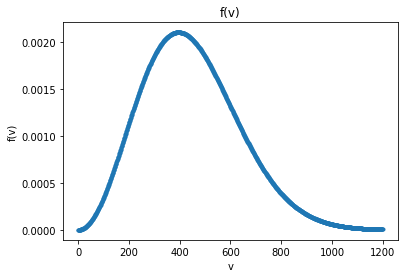

In [69]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi, e

v = np.arange(0., 1200., dtype='float')
coef1 = 4 * pi * (m/(2 * pi * k * T)) ** (3/2)
p_v = coef1 * (v ** 2) * e ** (-m * v ** 2 / (2 * k * T))

plt.figure()
plt.plot(v, p_v, '.')
plt.title('f(v)')
plt.xlabel('v')
plt.ylabel('f(v)')
plt.show()

### c)

La distribución...

## d) Fuerza sobre una pared de la caja

Utilizamos

$$
p = \frac{F}{A}
$$

In [73]:
# area total
A = 6 * lado ** 2

F = p * A

# FIXME: hay que dividir por 6?

print(f'El gas ejerce una fuerza de {F:.3f} N')

El gas ejerce una fuerza de 51442.809 N
